In [47]:
from imageIO import *
from matplotlib import pyplot as plt
from pyramids import *
from alg import *
from utils import *
from transforms import backWarp
# image = np.zeros((100, 100))
# image[20:40, 20:40] = 255
# image[70:80, 70:80] = 255
# plt.imshow(image, cmap='gray')
# plt.show()

image1 = readImage('./in/desert_low_res.jpg', True)
image2 = readImage('./in/desert_high_res.png', True)
image1 = pyramidDown(image1)
image2 = pyramidDown(image2)
emp1 = harrisCornerDedection(image1, 0.06, 15)
emp2 = harrisCornerDedection(image2, 0.06, 15)
emp1 = np.where(emp1 < getTheNBiggestValue(emp1, 50), 0, 255)
emp2 = np.where(emp2 < getTheNBiggestValue(emp2, 50), 0, 255)




103 [[0.99096685 0.08090563]
 [0.32380732 1.49111702]]


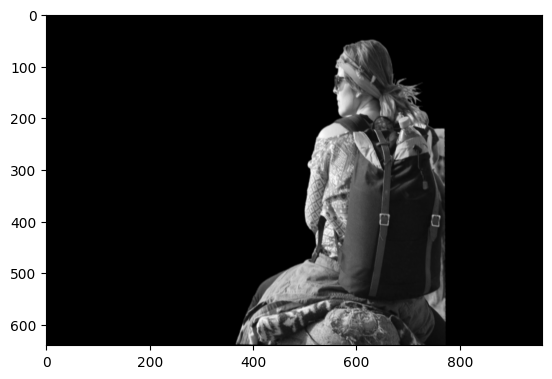

In [48]:
center_x = image1.shape[1]//2
center_y = image1.shape[0]//2
intrests_points1 = np.stack((np.where(emp1 == 255)[::-1]), axis=1)
intrests_points2 = np.stack((np.where(emp2 == 255)[::-1]), axis=1)
intrests_points1[:] -= [center_x,center_y]
intrests_points2[:] -= [center_x,center_y]
best_m = []
best_count = 0
while best_count < 100:
    choices1 = np.random.randint(0, intrests_points1.shape[0], 2, dtype='int')
    choices2 = np.random.randint(0, intrests_points2.shape[0], 2, dtype='int')
    choices1, choices2 = intrests_points1[choices1,
                                        :], intrests_points2[choices2, :]
                                
    if (np.linalg.det(choices2) != 0):

        M = choices1.T @ np.linalg.inv(choices2.T)
        after_transform = (M @ intrests_points2.T).T
        dis = np.sqrt((intrests_points1[:,np.newaxis]-after_transform)**2)
        count = np.count_nonzero(np.abs(dis)<2)
        if(count > best_count):
            best_m = M
            best_count = count
print(best_count,best_m) 
coords = np.zeros((image1.shape[0]*image1.shape[1], 2))
coords[:, 1] = np.repeat(np.arange(image1.shape[0]), image1.shape[1])-center_y
coords[:, 0] = np.tile(np.arange(image1.shape[1]), image1.shape[0])-center_y
dest_coords = (np.linalg.inv(best_m) @ coords.T).T
dest_coords[:]+=[center_x,center_y]
em = np.zeros(image1.shape)
backWarp(image2,em,dest_coords)
plt.imshow(em,cmap='gray')
plt.show()
image2 = em.copy()

/var/folders/f1/_vvn796x71jf48tctrq5cdmr0000gn/T/ipykernel_65112/518607028.py:4: RuntimeWarning: invalid value encountered in log
  axis[1].imshow(np.log(emp2+1),cmap='gray')


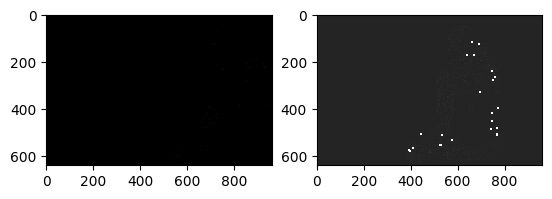

In [49]:
emp2 = harrisCornerDedection(image2, 0.06, 15)
f,axis = plt.subplots(1,2)
axis[0].imshow(np.log(emp1+1),cmap='gray')
axis[1].imshow(np.log(emp2+1),cmap='gray')
plt.show()
emp1_1 = np.where(emp1 < getTheNBiggestValue(emp1, 100), 0, 255)
emp2_1 = np.where(emp2 < getTheNBiggestValue(emp2, 100), 0, 255)


(100, 2)
480000 [[48  7]]


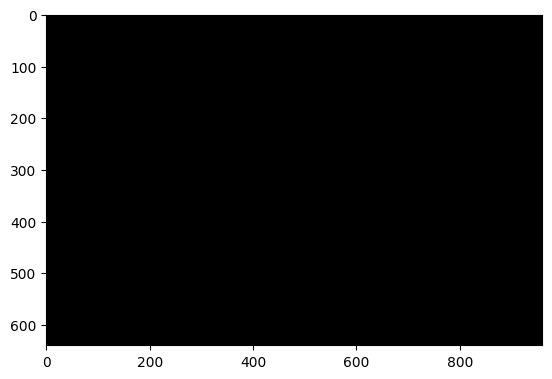

In [60]:
intrests_points1 = np.stack((np.where(emp1_1 == 255)[::-1]), axis=1)
intrests_points2 = np.stack((np.where(emp2_1 == 255)[::-1]), axis=1)
intrests_points1[:] -= [center_x,center_y]
intrests_points2[:] -= [center_x,center_y]
best_m = 0
best_count = 0
while best_count < 100:
    choices1 = np.random.randint(0, intrests_points1.shape[0], 1, dtype='int')
    choices2 = np.random.randint(0, intrests_points2.shape[0], 1, dtype='int')
    choices1, choices2 = intrests_points1[choices1,
                                        :], intrests_points2[choices2, :]
    m = choices1-choices2
    after_transform = intrests_points2[:]-m
    dis = np.sqrt((intrests_points1[:,np.newaxis]-after_transform)**2)
    count = np.count_nonzero(np.abs(dis)<2)
    if(count > best_count):
        best_m = m
        best_count = count
print(best_count,best_m) 
coords = np.zeros((image1.shape[0]*image1.shape[1], 2))
coords[:, 1] = np.repeat(np.arange(image1.shape[0]), image1.shape[1])-center_y
coords[:, 0] = np.tile(np.arange(image1.shape[1]), image1.shape[0])-center_y
dest_coords[:] -= best_m
dest_coords[:]-=[center_x,center_y]
em = np.zeros(image1.shape)
backWarp(image2,em,dest_coords)
plt.imshow(em,cmap='gray')
plt.show()
